In [ ]:
В организации уже существует БД, куда администратор Базы Данных добавил новую таблицу ” Customers”.
 Данные, как мы заметили, не находятся даже в 1НФ.
  Подумайте и предложите варианты приведения данных в 1-ю/2-ю и 3-ю нормальные формы:

Создайте таблицу в SQL и напишите код для преобразования таблицы к 1/2/3 НФ

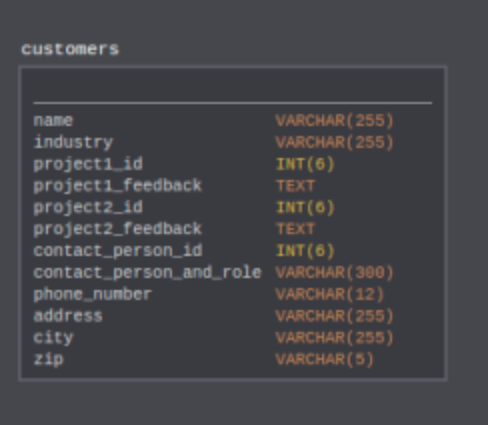

Воспользуемся Oracle Database 21c Express Edition


*   https://www.oracle.com/ru/database/technologies/xe-downloads.html

In [ ]:
SQL*Plus: Release 21.0.0.0.0 - Production on Sat Oct 30 11:50:01 2021
Version 21.3.0.0.0

Copyright (c) 1982, 2021, Oracle.  All rights reserved.

Enter user-name: myuser
Enter password:
Last Successful login time: Sat Oct 30 2021 11:37:20 +03:00

Connected to:
Oracle Database 21c Express Edition Release 21.0.0.0.0 - Production
Version 21.3.0.0.0
 
SQL>   CREATE TABLE Customers (
  2      name varchar(255),
  3      industry varchar(255),
  4      project1_id INT,
  5      project1_feedback varchar(255),
  6      project2_id INT,
  7      project2_feedback varchar(255),
  8      contact_person_id INT,
  9      contact_person_and_role varchar(300),
 10      phone_number varchar(12),
 11      address varchar(255),
 12      city varchar(255),
 13      zip varchar(5));

Table created.

SQL> descr Customers
 Name                                      Null?    Type
 ----------------------------------------- -------- ----------------------------
 NAME                                               VARCHAR2(255)
 INDUSTRY                                           VARCHAR2(255)
 PROJECT1_ID                                        NUMBER(38)
 PROJECT1_FEEDBACK                                  VARCHAR2(255)
 PROJECT2_ID                                        NUMBER(38)
 PROJECT2_FEEDBACK                                  VARCHAR2(255)
 CONTACT_PERSON_ID                                  NUMBER(38)
 CONTACT_PERSON_AND_ROLE                            VARCHAR2(300)
 PHONE_NUMBER                                       VARCHAR2(12)
 ADDRESS                                            VARCHAR2(255)
 CITY                                               VARCHAR2(255)
 ZIP                                                VARCHAR2(5)

1 НФ

*   Избавимся от неатомарных атрибутов "contact_person_and_role"




In [ ]:
SQL> alter TABLE Customers add ( CONTACT_PERSON VARCHAR2(255), ROLE VARCHAR2(255));

Table altered.

SQL> alter TABLE Customers drop (CONTACT_PERSON_AND_ROLE);

Table altered.

SQL> descr Customers
 Name                                      Null?    Type
 ----------------------------------------- -------- ----------------------------
 NAME                                               VARCHAR2(255)
 INDUSTRY                                           VARCHAR2(255)
 PROJECT1_ID                                        NUMBER(38)
 PROJECT1_FEEDBACK                                  VARCHAR2(255)
 PROJECT2_ID                                        NUMBER(38)
 PROJECT2_FEEDBACK                                  VARCHAR2(255)
 CONTACT_PERSON_ID                                  NUMBER(38)
 PHONE_NUMBER                                       VARCHAR2(12)
 ADDRESS                                            VARCHAR2(255)
 CITY                                               VARCHAR2(255)
 ZIP                                                VARCHAR2(5)
 ID                                        NOT NULL NUMBER(38)
 CONTACT_PERSON                                     VARCHAR2(255)
 ROLE                                               VARCHAR2(255)

2 НФ 


*   Добавим первичный ключ




In [ ]:
SQL> alter TABLE Customers add ( id int primary key);

Table altered.

SQL> descr Customers
 Name                                      Null?    Type
 ----------------------------------------- -------- ----------------------------
 NAME                                               VARCHAR2(255)
 INDUSTRY                                           VARCHAR2(255)
 PROJECT1_ID                                        NUMBER(38)
 PROJECT1_FEEDBACK                                  VARCHAR2(255)
 PROJECT2_ID                                        NUMBER(38)
 PROJECT2_FEEDBACK                                  VARCHAR2(255)
 CONTACT_PERSON_ID                                  NUMBER(38)
 PHONE_NUMBER                                       VARCHAR2(12)
 ADDRESS                                            VARCHAR2(255)
 CITY                                               VARCHAR2(255)
 ZIP                                                VARCHAR2(5)
 CONTACT_PERSON                                     VARCHAR2(255)
 ROLE                                               VARCHAR2(255)
 ID                                        NOT NULL NUMBER(38)

3 НФ


*   Вынесем самостоятельные сущности в отдельные отношения



In [ ]:

SQL> create table Contacts as select id, CONTACT_PERSON, ROLE from Customers;

Table created.

SQL> descr contacts;
 Name                                      Null?    Type
 ----------------------------------------- -------- ----------------------------
 ID                                                 NUMBER(38)
 CONTACT_PERSON                                     VARCHAR2(255)
 ROLE                                               VARCHAR2(255)

SQL> alter TABLE Contacts drop ( id );

Table altered.

SQL> alter TABLE Contacts add ( id int not null primary key);

Table altered.

SQL> alter TABLE Customers add FOREIGN KEY (contact_person_id) REFERENCES Contacts(id);

Table altered.

SQL> create table INDUSTRY as select id,  INDUSTRY from Customers;

Table created.

SQL> descr INDUSTRY
 Name                                      Null?    Type
 ----------------------------------------- -------- ----------------------------
 ID                                                 NUMBER(38)
 INDUSTRY                                           VARCHAR2(255)

SQL> alter TABLE Customers add INDUSTRY_id int;

Table altered.
                                                                        *
SQL> alter TABLE INDUSTRY MODIFY id primary key;

Table altered.

SQL> alter TABLE Customers add FOREIGN KEY (INDUSTRY_id) REFERENCES INDUSTRY(id);

Table altered.

SQL> CREATE TABLE Projects (
  2  id INT PRIMARY KEY,
  3  name varchar(300),
  4  project_feedback varchar(255),
  5  start_date DATE,
  6  end_date DATE);

Table created.

SQL> descr Projects
 Name                                      Null?    Type
 ----------------------------------------- -------- ----------------------------
 ID                                        NOT NULL NUMBER(38)
 NAME                                               VARCHAR2(300)
 PROJECT_FEEDBACK                                   VARCHAR2(255)
 START_DATE                                         DATE
 END_DATE                                           DAT


SQL> alter TABLE projects add customer_id int;

Table altered.

SQL> alter TABLE Projects add FOREIGN KEY (customer_id) REFERENCES Customers(id);

Table altered.


SQL> descr Customers
 Name                                      Null?    Type
 ----------------------------------------- -------- ----------------------------
 NAME                                               VARCHAR2(255)
 INDUSTRY                                           VARCHAR2(255)
 PROJECT1_ID                                        NUMBER(38)
 PROJECT1_FEEDBACK                                  VARCHAR2(255)
 PROJECT2_ID                                        NUMBER(38)
 PROJECT2_FEEDBACK                                  VARCHAR2(255)
 CONTACT_PERSON_ID                                  NUMBER(38)
 PHONE_NUMBER                                       VARCHAR2(12)
 ADDRESS                                            VARCHAR2(255)
 CITY                                               VARCHAR2(255)
 ZIP                                                VARCHAR2(5)
 CONTACT_PERSON                                     VARCHAR2(255)
 ROLE                                               VARCHAR2(255)
 ID                                        NOT NULL NUMBER(38)
 INDUSTRY_ID                                        NUMBER(38)


SQL> alter TABLE Customers drop (INDUSTRY, PROJECT1_ID, PROJECT2_ID, PROJECT1_FEEDBACK, PROJECT2_FEEDBACK);

Table altered.

SQL> alter TABLE Customers drop ( CONTACT_PERSON, ROLE);

Table altered.

SQL> descr Customers
 Name                                      Null?    Type
 ----------------------------------------- -------- ----------------------------
 NAME                                               VARCHAR2(255)
 CONTACT_PERSON_ID                                  NUMBER(38)
 PHONE_NUMBER                                       VARCHAR2(12)
 ADDRESS                                            VARCHAR2(255)
 CITY                                               VARCHAR2(255)
 ZIP                                                VARCHAR2(5)
 ID                                        NOT NULL NUMBER(38)
 INDUSTRY_ID                                        NUMBER(38)

SQL> descr Projects
 Name                                      Null?    Type
 ----------------------------------------- -------- ----------------------------
 ID                                        NOT NULL NUMBER(38)
 NAME                                               VARCHAR2(300)
 PROJECT_FEEDBACK                                   VARCHAR2(255)
 START_DATE                                         DATE
 END_DATE                                           DATE
 CUSTOMER_ID                                        NUMBER(38)

SQL> descr Contacts
 Name                                      Null?    Type
 ----------------------------------------- -------- ----------------------------
 CONTACT_PERSON                                     VARCHAR2(255)
 ROLE                                               VARCHAR2(255)
 ID                                        NOT NULL NUMBER(38)

SQL> descr INDUSTRY
 Name                                      Null?    Type
 ----------------------------------------- -------- ----------------------------
 ID                                        NOT NULL NUMBER(38)
 INDUSTRY                                           VARCHAR2(255)

SQL>